# Цель 
Обзорное изучение рынка вакансий для аналитика

# Импорт библиотек

In [ ]:
# Библиотека для работы с HTTP-запросами. Будем использовать ее для обращения к API HH
import requests
# Пакет для удобной работы с данными в формате json
import json
import pandas as pd 
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from folium import Map, Choropleth
from folium import Marker
from folium.plugins import MarkerCluster

# Выгрузка данных

In [ ]:
BASE_URL = "https://api.hh.ru/vacancies"

    # Справочник для параметров GET-запроса
params = {
    'text': 'NAME:Аналитик', # Текст фильтра. В имени должно быть слово "Аналитик"
    'area': 1, # Поиск ощуществляется по вакансиям города Москва
    #'page': page, # Индекс страницы поиска на HH
    'per_page': 100 # Кол-во вакансий на 1 странице
    }
    
response = requests.get(BASE_URL, params=params) # Посылаем запрос к AP

# Считываем первые 2000 вакансий
for page in range(0, 30):
    response_parsed  = json.loads(response.text)

response_parsed = response_parsed['items']

# Датасет 

Формируем датасет и выгружаем данные в таблицу

In [ ]:
df = pd.DataFrame() 

In [ ]:
df['name'] = [item['name'] for item in response_parsed]
df['salary'] = [item['salary'] for item in response_parsed]
df['test'] = [item['has_test'] for item in response_parsed]
df['experience'] = [item['experience'] for item in response_parsed]
df['employment'] = [item['employment'] for item in response_parsed]
df['employer'] = [item['employer'] for item in response_parsed]
df['address'] = [item['address'] for item in response_parsed]
df['snippet'] = [item['snippet'] for item in response_parsed]
df['url'] = [item['alternate_url'] for item in response_parsed]

# Предобработка данных

Нам нужны все данные, поэтому удаляем пропуски

In [ ]:
df = df.dropna()

Достаем данные из словаря

In [ ]:
df['experience'] = [item['name'] for item in df['experience']]

In [ ]:
df['employer'] = [item['name'] for item in df['employer']]

In [ ]:
df['employment'] = [item['name'] for item in df['employment']]

In [ ]:
df['salary'] = [item['from'] for item in df['salary']]

In [ ]:
df['lat'] = [item['lat'] for item in df['address']]

In [ ]:
df['lng'] = [item['lng'] for item in df['address']]

In [ ]:
df['address'] = [item['street'] for item in df['address']]

In [ ]:
df['snippet'] = [item['requirement'] for item in df['snippet']]

In [ ]:
df = df.reset_index()

In [ ]:
df

,index,name,salary,test,experience,employment,employer,address,snippet,url,lat,lng
0,4,Стажер аналитик данных,45000.0,False,Нет опыта,Полная занятость,Х5 Group,Средняя Калитниковская улица,Уверенный пользователь Excel. Если есть релева...,https://hh.ru/vacancy/80214260,55.730912,37.697612
1,8,Химик-аналитик,120000.0,False,От 3 до 6 лет,Полная занятость,ФГБУ НМИЦ онкологии им. Н.Н. Блохина Минздрава...,Каширское шоссе,Высшее химическое или химико-технологическое о...,https://hh.ru/vacancy/80444688,55.659391,37.643712
2,16,Стажер-аналитик,NaN,False,Нет опыта,Стажировка,Nestle,Павелецкая площадь,Высшее/незаконченное высшее образование (эконо...,https://hh.ru/vacancy/80439211,55.730426,37.634793
3,17,Специалист по обработке данных (аналитик),50000.0,False,От 1 года до 3 лет,Полная занятость,Фортис Технологии,Хорошёвское шоссе,"Работа, требующая аналитического склада ума, п...",https://hh.ru/vacancy/80500815,55.777474,37.521704
4,21,Аналитик,NaN,False,От 3 до 6 лет,Полная занятость,Гринатом,1-й Нагатинский проезд,"Уверенное владение ПК (в том числе, офисными п...",https://hh.ru/vacancy/80504775,55.678418,37.632278
5,33,Спортивный аналитик,62000.0,False,Нет опыта,Полная занятость,Техно Трейд,None,Уверенные знания математики и аналитическое мы...,https://hh.ru/vacancy/80077113,NaN,NaN
6,34,Экономист-аналитик по работе с договорами,150000.0,False,Нет опыта,Полная занятость,АНО Россия – Страна Возможностей,1-й Красногвардейский проезд,Высшее образование (экономическое ). Знания ос...,https://hh.ru/vacancy/80495607,55.750028,37.534397
7,39,Аналитик,NaN,False,Нет опыта,Полная занятость,DSM Group,улица Правды,Уверенное владение MS Excel (на уровне использ...,https://hh.ru/vacancy/80485628,55.785200,37.579244
8,41,Data Analyst (Стажёр),NaN,False,Нет опыта,Стажировка,М.Видео-Эльдорадо,Нижняя Красносельская улица,Знания SQL. Неоконченное высшее образование.,https://hh.ru/vacancy/80499551,55.774750,37.668848
9,45,Аналитик,65000.0,False,Нет опыта,Полная занятость,В/ч 2320,улица Большая Лубянка,Отсутствие родственников за рубежом. Годность ...,https://hh.ru/vacancy/79654774,55.763442,37.628927


# Визуализация

## Карта

Для визуализации на карте необходимо очистить столбцы с коорднатами от пропусков

In [ ]:
df_for_map = df.dropna(subset=['lat'])

Визуализируем вакансии на карте. При нажатии на маячок, будет высвечиваться название вакансии,предлагаемся ЗП (если она указана) и ссылка на вакансию

In [ ]:
m = Map(location=[55.75222, 37.61556], zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['salary'], row['url']}",
    ).add_to(marker_cluster)


df_for_map.apply(create_clusters, axis=1)
display (m)

## Распределение ЗП

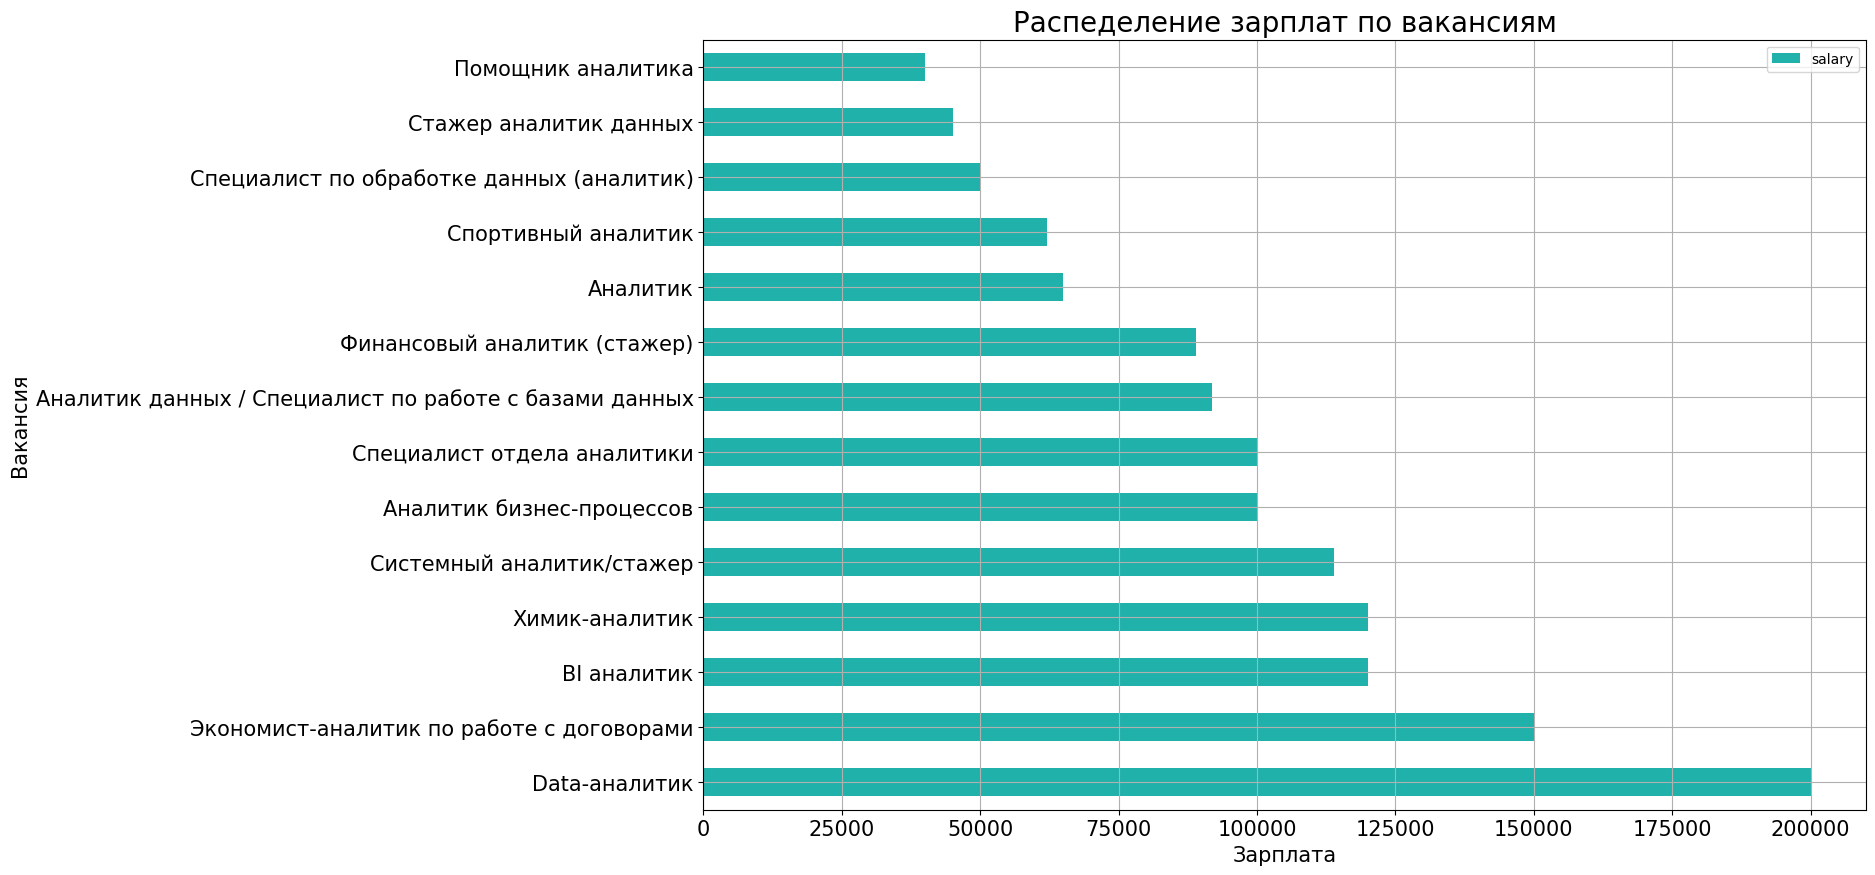

In [ ]:
salary = (df.groupby(['name'])                        #формируем датасет
        .agg({'salary': 'median'})
        .sort_values(by='salary', ascending=False)
        .reset_index())

salary = salary.dropna(subset=['salary'])             #удаляем пропуски

salary.plot(                                          #строим график
    x='name', y='salary',
    kind='barh', figsize=(15, 10), grid=True,
    color=['#20B2AA'], fontsize=15
) 

plt.title('Распеделение зарплат по вакансиям', fontsize=20)
plt.ylabel('Вакансия', fontsize=15)
plt.xlabel('Зарплата', fontsize=15)
plt.show()

## Средняя ЗП

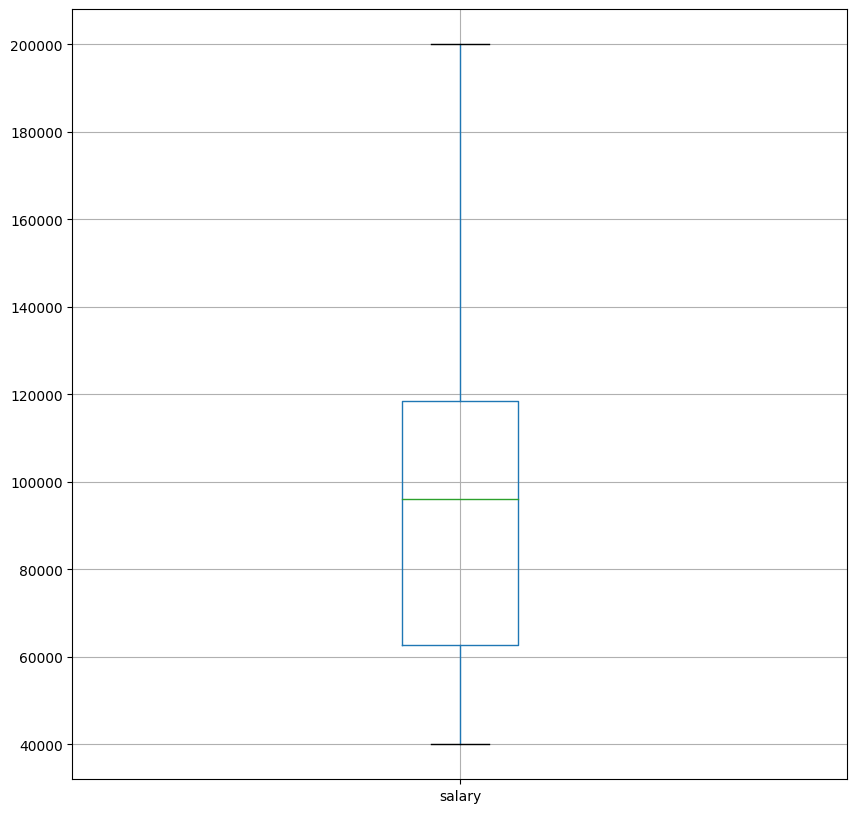

In [ ]:
salary.boxplot(column='salary', figsize=(10, 10))
plt.gca().ticklabel_format(axis="y", style='plain')
plt.show()

## Распределение опыта

Проверим, на сколько сложно джуну найти работу в аналитике

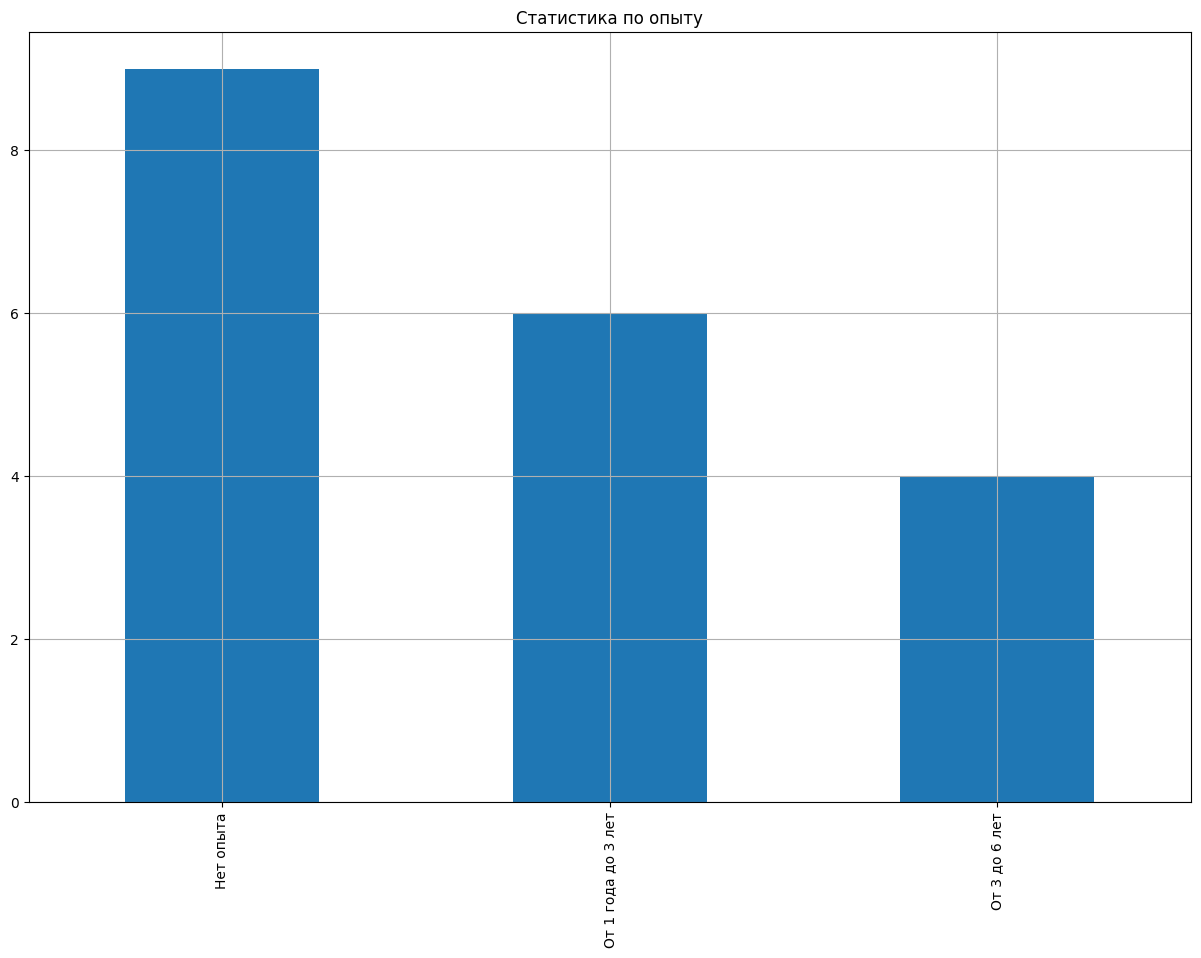

In [ ]:
df['experience'].value_counts().plot(kind='bar', grid=True, figsize=(15, 10))
plt.title('Статистика по опыту')
plt.show()